# 项目：TMDb - 电影数据集分析

## 目录
<ul>
<li><a href="#intro">一. 简介</a></li>
<li><a href="#wrangling">二. 数据整理</a></li>
<li><a href="#eda">三. 探索性数据分析</a></li>
<li><a href="#conclusions">四. 结论及局限性</a></li>
<li><a href="#reference">五. 参考</a></li>
</ul>

<a id='intro'></a>
## 一. 简介

> TMDb电影数据集包含了从1960年至2015年部分电影的成本、票房、类别、导演等信息  
本项目将通过对该数据集的分析，探索以下几个问题:
* 2015年的电影关键字都有哪些？
* 评分 `vote_average` 前十的电影是哪些？
* 1960年至2015年，电影的发行趋势？
* 1960年至2015年，电影的票房趋势？
* 在不考虑通货膨胀的情况下，利润最高的前十部电影？
* 出演最多电影的前二十名演员及其票房？
* 票房超过10亿美金的电影有什么特点？

> **电影数据库字段描述**  
本数据集中包含 1 万条电影信息，信息来源为“电影数据库”（TMDb，The Movie Database）

字段|描述|数据类型
:-----|:-----|:------
id	      |          id  | int64
imdb_id	   |             电影网站IMDb的id  | object
popularity	|            电影的热门程度  | float64
budget	     |           电影的成本  | int64
revenue	      |          电影的票房  | int64
original_title	|        电影的名称  | object
cast		   |       电影的演职人员  | object
homepage	    |        电影的网站首页 | object
director	     |       电影的导演  | object
tagline	          |      电影的宣传语 |  object
keywords		   |     电影的主题关键词 | object
overview		|        电影的概述  |object
runtime		     |       电影的时长  | int64
genres            |      电影的类别  | object
production_companies  |  电影的制片商 |  object
release_date	  |      电影的上映日期 |  object
vote_count	       |     电影的投票人数  | int64
vote_average	    |    电影的投票平均分 | float64
release_year	     |   电影的上映年份  | int64
budget_adj |           通货膨胀后电影的预算 | float64
revenue_adj |        通货膨胀后电影的收入 | float64



In [458]:
# 导入数据包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from wordcloud import WordCloud
% matplotlib inline

pd.set_option('max_columns', 100) 
pd.set_option('max_rows', 10000) 

<a id='wrangling'></a>
## 二. 数据整理

### 1. 常规属性

In [406]:
# 加载数据
df = pd.read_csv('tmdb.csv')
# 查看数据
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


查看数据各列的数据类型

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

查看各列共有多少行缺失值

In [408]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

查看有无重复值

In [409]:
df.duplicated().sum()

1

查看数据概况

In [410]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### 2. 清理数据

#### 2.1 清理与分析无关的列
`imdb_id`、`homepage`、`tagline`、`overview`、`production_companies`、`vote_count`、`budget_adj`、`revenue_adj`

In [411]:
# 清理多余列
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'production_companies', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [412]:
# 确认清理
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 1.1+ MB


#### 2.2 更改数据类型

将 `release_date` 更改为 datetime 类型

In [413]:
# 将 release_date 列拆分成 day 和 month
df['month'] = df['release_date'].apply(lambda x: x.split('/')[0]) 
df['day'] = df['release_date'].apply(lambda x: x.split('/')[1])

In [414]:
# 合并 release_year 和 month 列
# 将 release_year 替换成 str 类型
df['release_year'] = df['release_year'].astype('str')
df['release_date'] = df['release_year'].str.cat(df['month'], sep='/')

In [415]:
# 合并 release_date 和 day 列
df['release_date'] = df['release_date'].str.cat(df['day'], sep='/')

In [416]:
# 删除 month 和 day 列
df.drop(['month', 'day'], axis=1, inplace=True)

In [417]:
# 将 release_year 转换成 int
df['release_year'] = df['release_year'].astype('int')

In [418]:
# 将 release_date 替换成 datetime 类型
df['release_date'] = pd.to_datetime(df['release_date'])

若直接将 `release_date` 替换成 datetime 类型， 会有部分日期不对  
比如说 12/16/66 ，替换成 datetime 的预期值为 1966/12/16  
但直接使用 to_datetime()， 会变成 2066/12/16  
因此进行以上步骤，保证日期正确

In [419]:
# 确认数据类型修改成功
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null datetime64[ns]
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.1+ MB


#### 2.3 清理NaN行

`budget` 和 `revenue` 列有部分数据值为0，显然不合乎常理，因此要将数据值为0的行全部删除

In [420]:
# 将 budget 和 revenue 数据值为0的行全部替换成 NaN
rows = ['budget', 'revenue']
df[rows] = df[rows].replace(0, np.NaN)

In [421]:
# 清理nan数据行
df.dropna(inplace=True)

In [422]:
# 查看 df 的行列数
df.shape

(3714, 13)

#### 2.4 清理重复数据

In [423]:
# 清理重复数据
df.drop_duplicates(inplace=True)

In [424]:
# 确认清理重复数据
df.duplicated().sum()

0

#### 2.5 最后确认数据清理成功

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3713 entries, 0 to 10848
Data columns (total 13 columns):
id                3713 non-null int64
popularity        3713 non-null float64
budget            3713 non-null float64
revenue           3713 non-null float64
original_title    3713 non-null object
cast              3713 non-null object
director          3713 non-null object
keywords          3713 non-null object
runtime           3713 non-null int64
genres            3713 non-null object
release_date      3713 non-null datetime64[ns]
vote_average      3713 non-null float64
release_year      3713 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 406.1+ KB


清理完数据后，从原本的10866行、21列缩减至3849行、12列

<a id='eda'></a>
## 三. 探索性数据分析

### 1. 2015年的电影关键字都有哪些？

将分割具有 '|' 的列定义为一个函数，以便后续使用

In [453]:
def obtain_data(dataframe, columns_name):
    """
        整理具有‘|’的列
        
        parameter: dataframe: 数据集
                   columns_name: 列名
                   
        return: 整理好的 series 格式的数据 
    """
    # 将所有的字符拼接为一串，以’|‘为分隔符
    orignal_data = dataframe[columns_name].str.cat(sep='|')
    
    # 以‘|’为分隔符，将 all_data 字符串分割成列表
    split_data = pd.Series(orignal_data.split('|'))
    
    # 统计数据出现的次数及按降序排序
    final_data = split_data.value_counts(ascending=False)
    
    return final_data

In [481]:
# 获取15年的所有 keywords
kw_15 = obtain_data(df.query('release_year == 2015'), 'keywords')

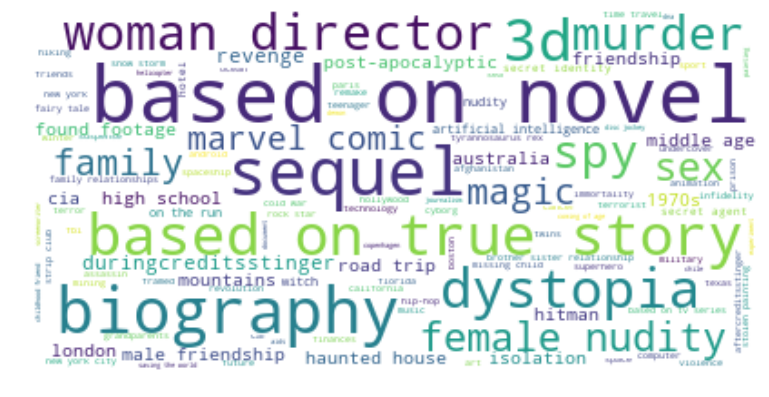

In [534]:
# 绘制词云
wc = WordCloud(background_color='white').generate_from_frequencies(kw_15)
plt.figure(figsize=(13,8))
plt.imshow(wc, interpolation = "bilinear")
plt.axis('off')
plt.show()

2015年最流行的关键字为`based on novel`、`based on true story`、`biography`、`sequel`

### 2. 评分 `vote_average` 前十的电影是哪些 ?

In [426]:
# 获取评分前十的电影
vote_top = df[['original_title', 'vote_average']].nlargest(10, 'vote_average')

In [427]:
vote_top

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1
2875,The Dark Knight,8.1
4177,Pulp Fiction,8.1
4179,Forrest Gump,8.1
9758,The Godfather: Part II,8.1
10222,Schindler's List,8.1


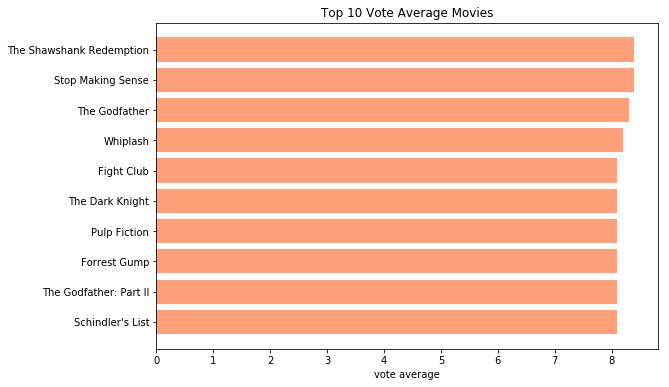

In [428]:
# 开始绘制图形
fig, ax = plt.subplots(figsize=(9,6))

# 数据从高至低表示
ax.invert_yaxis()

# 设置每条 bar
ax.barh(vote_top['original_title'], vote_top['vote_average'], color='lightsalmon')

# 设置标题
ax.set_title('Top 10 Vote Average Movies')

# 设置 x轴 标签
ax.set_xlabel('vote average')

plt.show()

观众评分前十的电影平均分均在8分以上，其中 `The Shawshank Redemption` 最高分，8.4分； `Schindler's List` 最低分，8.1分

### 3. 1960年至2015年，电影的发行趋势？

In [429]:
# 获取每年都有多少部电影发行
trend = df.groupby(['release_year'])['id'].count()

In [430]:
def plot_chart(dataframe, title, x_label, y_label):
    # 开始绘制图形
    fig, ax = plt.subplots(figsize=(11,6))

    # 绘制bar chart
    ax.bar(dataframe.index, dataframe, color='limegreen', alpha=0.7)
    # 绘制 line chart
    dataframe.plot(kind='line', color='deepskyblue')
        
    # 设置标题
    ax.set_title(title)

    # 设置 x轴 标签
    ax.set_xlabel(x_label)

    # 设置 x轴 刻度间距
    ax.xaxis.set_major_locator(MaxNLocator())

    # 设置 y轴 标签
    ax.set_ylabel(y_label)

    plt.show()

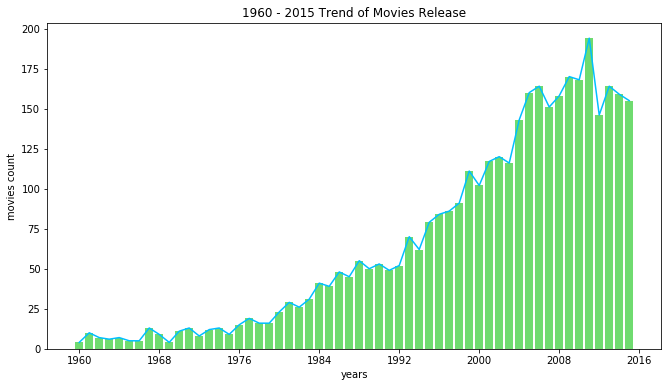

In [431]:
# 绘制图表
plot_chart(trend, title='1960 - 2015 Trend of Movies Release', x_label='years', y_label='movies count')

> 从1960年至2015年总共有56年，全部显示在 x轴 坐标的话很显得很拥挤，基本看不清年份  
可以通过 [matlibplot.ticker.MaxNLocator](https://matplotlib.org/api/ticker_api.html#matplotlib.ticker.MaxNLocator) 方法修改刻度之间的间距

由以上的柱形图可以看出，1960年至2015年，电影的发行量呈现逐年上增的趋势

### 4. 1960年至2015年，电影的票房趋势？

In [432]:
# 获取每年的电影票房
revenue = df.groupby(['release_year'])['revenue'].sum()

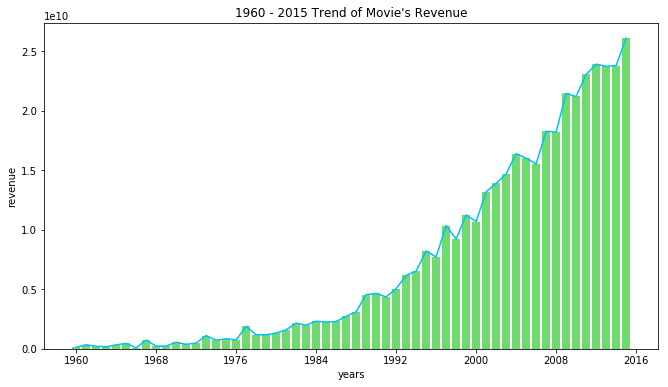

In [433]:
# 绘制图表
plot_chart(revenue, title="1960 - 2015 Trend of Movie's Revenue", x_label='years', y_label='revenue')

由以上的柱形图可以看出，1960年至2015年，电影的票房呈现逐年上增的趋势

### 5. 在不考虑通货膨胀的情况下，利润最高的前十部电影？

In [434]:
# 新建一列 profit 列，用于存储电影的利润数据
df.insert(4, 'profit', df['revenue'] - df['budget'])

In [435]:
# 获取利润前十的电影的 original_title、budget、revenue、profit
profit_top = df[['original_title', 'budget', 'revenue', 'profit']].nlargest(10, 'profit')

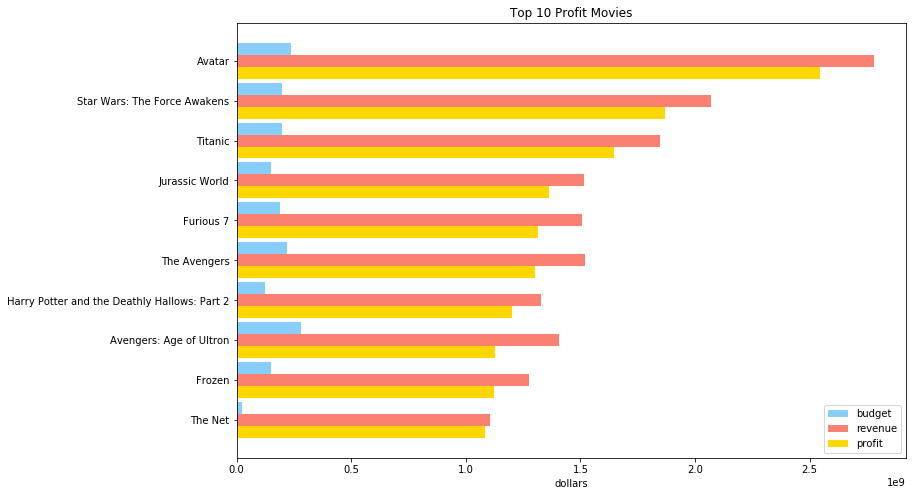

In [436]:
# y轴起始坐标
ind = np.arange(len(profit_top))

# bar的宽度
width = 0.3

# 开始绘制图形
fig, ax = plt.subplots(figsize=(12,8))

# 数据从高至低表示
ax.invert_yaxis()

# 设置每条 bar
p1 = ax.barh(ind, profit_top['budget'], width, color='lightskyblue', label='budget')
p2 = ax.barh(ind+width, profit_top['revenue'], width, color='salmon', label='revenue')
p3 = ax.barh(ind+width*2, profit_top['profit'], width, color='gold', label='profit')

# 设置标题
ax.set_title('Top 10 Profit Movies')

# 设置 y轴 刻度的位置
ax.set_yticks(ind+width)

# 设置 y轴 刻度标签的位置
ax.set_yticklabels(profit_top['original_title'])

# 设置 x轴 标签
ax.set_xlabel('dollars')

# 设置图例
ax.legend()

plt.show()

由上可知，利润最高的电影为 2009年上映的 `Avatar`  
电影的成本仅为 2亿3千万美元，但电影的票房高达 27亿8千万美元，利润为 25亿4千万美元  

### 6. 出演最多电影的前二十名演员及其票房？

In [438]:
# 获取整理后的 cast 数据
casts = obtain_data(df, 'cast')

In [439]:
casts[:20]

Robert De Niro           50
Bruce Willis             46
Samuel L. Jackson        43
Nicolas Cage             42
Johnny Depp              35
Morgan Freeman           34
Tom Hanks                34
Matt Damon               34
Brad Pitt                34
Tom Cruise               33
Eddie Murphy             32
Harrison Ford            32
Denzel Washington        32
Sylvester Stallone       31
Robin Williams           29
Meryl Streep             29
Liam Neeson              29
Owen Wilson              29
Arnold Schwarzenegger    29
Mark Wahlberg            29
dtype: int64

In [440]:
# 获取前二十的演员的总票房数据
i = 0
t = []
while i < len(casts[:20]):
    t.append(df[df['cast'].str.contains(casts.index[i])]['revenue'].sum())
    i += 1

# 转换成 Series
top_revenue = pd.Series(t)

In [441]:
top_revenue.sort_values(ascending=False)

9     8.795203e+09
11    8.516636e+09
6     8.273073e+09
4     7.947462e+09
2     7.005004e+09
1     6.550819e+09
8     6.515918e+09
10    6.322067e+09
14    5.408433e+09
16    5.286803e+09
7     5.011808e+09
0     4.934559e+09
18    4.715098e+09
3     4.712039e+09
17    4.391327e+09
13    4.327164e+09
19    4.046183e+09
5     3.920197e+09
12    3.683234e+09
15    3.148358e+09
dtype: float64

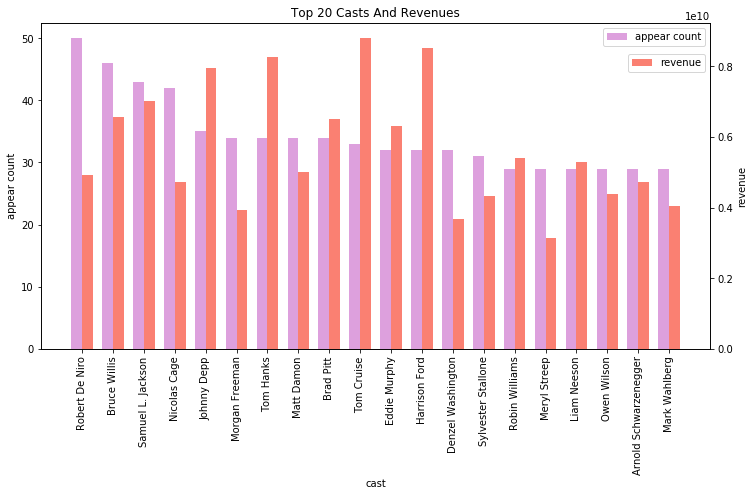

In [518]:
# x轴起始坐标
ind = np.arange(len(top_revenue))

# 开始绘制图形
fig, ax = plt.subplots(figsize=(12,6))

ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

# bar 的宽度
width = 0.35

p1 = ax.bar(ind, casts[:20], width, color='plum', label='appear count')
p2 = ax2.bar(ind+width, top_revenue, width, color='salmon', label='revenue')

ax.set_title('Top 20 Casts And Revenues')
ax.set_ylabel('appear count')
ax.set_xlabel('cast')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(casts.index[:20], rotation='vertical')
ax2.set_ylabel('revenue')

ax.legend()
ax2.legend(bbox_to_anchor=(1.0, 0.92))

plt.show()


`Robert De Niro` 是演过最多电影的演员，一共出演了52部电影，但是他的票房却不是最高的，只排在第四名  
`Tom Cruise` 虽然不是演过最多电影的演员，但是却凭借33部电影拿下87亿美元的票房成就

### 7. 票房超过10亿美金的电影有什么特点？

In [443]:
# 获取票房超过10亿美金的电影数据
bil_df = df.query('revenue >= 1000000000').sort_values(by=['revenue'], ascending=False)

In [444]:
bil_df['original_title'].count()

22

In [445]:
bil_df.head(3)

,id,popularity,budget,revenue,profit,original_title,cast,director,keywords,runtime,genres,release_date,vote_average,release_year
1386,19995,9.432768,237000000.0,2.781506e+09,2.544506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,culture clash|future|space war|space colony|so...,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,7.1,2009
3,140607,11.173104,200000000.0,2.068178e+09,1.868178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,7.5,2015
5231,597,4.355219,200000000.0,1.845034e+09,1.645034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,shipwreck|iceberg|ship|panic|titanic,194,Drama|Romance|Thriller,1997-11-18,7.3,1997


总共有22部电影的票房超过10亿美金

#### 6.1 电影时长

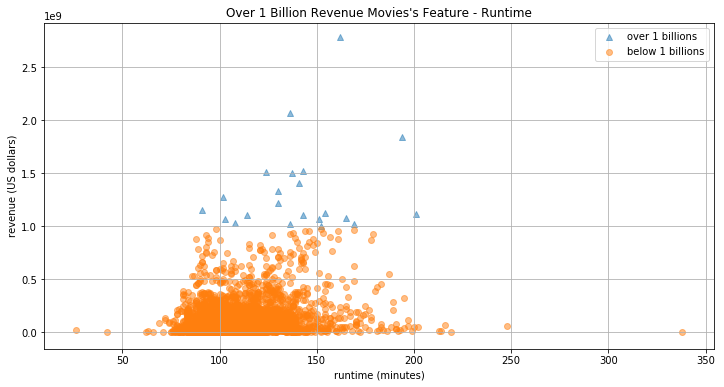

In [446]:
x = df.query('revenue < 1000000000')['runtime']
y = df.query('revenue < 1000000000')['revenue']

plt.figure(figsize=(12,6))
plt.scatter(bil_df['runtime'], bil_df['revenue'], marker='^', label='over 1 billions', alpha=0.5)
plt.scatter(x, y, marker='o', label='below 1 billions', alpha=0.5)
plt.xlabel('runtime (minutes)')
plt.ylabel('revenue (US dollars)')
plt.title("Over 1 Billion Revenue Movies's Feature - Runtime")
plt.grid(True)
plt.legend();

票房超过10亿美金的电影时长大部分集中在100-200分钟这个区间内

#### 6.2 导演

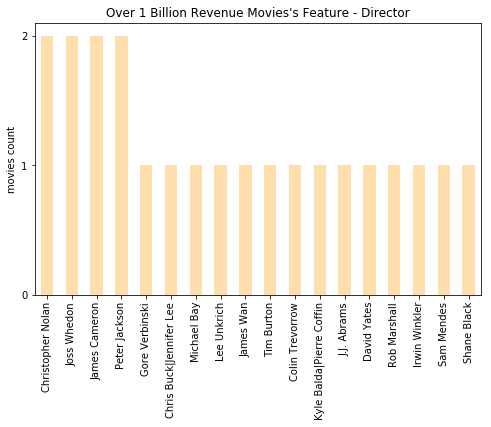

In [447]:
# 超10亿美金的电影都是哪些导演拍摄的
bil_df['director'].value_counts().plot(kind='bar', color='navajowhite', figsize=(8,5))

# y轴 刻度显示整数
plt.yticks(range(3))

# 标题
plt.title("Over 1 Billion Revenue Movies's Feature - Director")

# y轴 标签
plt.ylabel('movies count');

导演 `Christopher Nolan`、`Joss Whedon`、`Peter Jackson`、`James Cameron`各拍摄了两部票房超10亿美金的电影，占超过10亿美金电影总数的36%，其余导演均是一部作品超过10亿美金  

#### 6.3 电影类型

In [448]:
# 获取整理后的 genres 数据
genres = obtain_data(bil_df, 'genres')

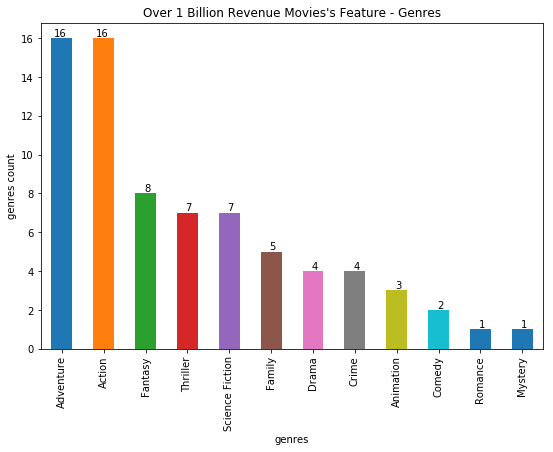

In [449]:
# 绘制图形
genres.plot(kind='bar', figsize=(9,6))

# 标题
plt.title("Over 1 Billion Revenue Movies's Feature - Genres")

# x轴 标题
plt.xlabel('genres')

# 设置柱状图标示
for x,y in zip(np.arange(len(genres)), genres):
    plt.text(x+0.11, y, y, ha='right', va='bottom')

# y轴 标题
plt.ylabel('genres count');

由上图可知：
* `Adventure` 和 `Action` 类占据高票房电影类型的比例最多，分别占据总电影类别的21.6%
* `Mystery` 和 `Romance` 类占据高票房电影类型的比例最少，分别占据总电影类别的1.35%

<a id='conclusions'></a>
## 四. 结论及局限性

> **结论**：  
从以上的数据得知，如果想要拍摄一部票房高的电影，可从以下几个要素考虑：
* 演员选角：Tom Cruise、Harrison Ford、Tom Hanks、Johnny Depp、Samuel L. Jackson
* 导演：Christopher Nolan、Joss Whedon、 James Cameron、Peter Jackson、 Gore Verbinski
* 电影类型：Adventure、Action、Fantasy
* 电影时长：100-200分钟之间

> **局限性**：
* 该数据集原本有10866条数据，经过数据清洗筛选后，只剩下3849条数据，而数据集中过多的NaN数据是很多原本有价值的数据也被清理，因此用剩下的数据进行分析，准确性有所下降
* `budget` 和 `revenue` 列没有明确的币种显示，每部电影的发行地区不一样，币种就会不一样，该分析默认币种是美元，可能会对分析结论造成一定的偏差
* 分析票房高的电影的特点停留在比较浅的层面，只从电影时长、导演、电影类型三个方面进行了分析，但是电影票房有很多其他因素构成，比如编剧、摄像、美工等等，但是这些因素没有在这个数据集中

<a id='reference'></a>
## 五. 参考

wordcloud：https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe/43606497  
legend location:https://stackoverflow.com/questions/11348183/pandas-bar-plot-with-specific-colors-and-legend-location